In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.ToTensor()

# train data 가져오기
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.2MB/s]


In [3]:
# test data 가져오기
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [4]:
# batch size = 64로 동일하게
batch_size = 64

# trainset, testset에 대한 dataloader
# trainset은 shuffle=True, testset은 shuffle=False
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [5]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
trainloader

In [8]:
testloader

In [9]:
from torch import nn

# 모델 정의
class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    # MNIST가 0부터 9까지 예측하는 모델 : 10개의 perceptron

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    # x = self.act(self.layer3(x)) // 3번째 ReLU를 제외시키니 정확도가 83에서 93으로 증가함

    return x

In [15]:
model = Model(28 * 28 * 1, 1024)

[Epoch 1] Loss: 2285.0703 | Train Acc: 0.7578 | Test Acc: 0.7640
[Epoch 2] Loss: 1407.2569 | Train Acc: 0.7946 | Test Acc: 0.8016
[Epoch 3] Loss: 1078.2961 | Train Acc: 0.8223 | Test Acc: 0.8284
[Epoch 4] Loss: 878.5987 | Train Acc: 0.8356 | Test Acc: 0.8428
[Epoch 5] Loss: 752.0793 | Train Acc: 0.8431 | Test Acc: 0.8496
[Epoch 6] Loss: 667.0042 | Train Acc: 0.8537 | Test Acc: 0.8611
[Epoch 7] Loss: 606.5730 | Train Acc: 0.8601 | Test Acc: 0.8685
[Epoch 8] Loss: 561.6837 | Train Acc: 0.8645 | Test Acc: 0.8718
[Epoch 9] Loss: 526.7852 | Train Acc: 0.8686 | Test Acc: 0.8758
[Epoch 10] Loss: 499.1104 | Train Acc: 0.8726 | Test Acc: 0.8791
[Epoch 11] Loss: 476.6159 | Train Acc: 0.8759 | Test Acc: 0.8823
[Epoch 12] Loss: 458.0036 | Train Acc: 0.8784 | Test Acc: 0.8852
[Epoch 13] Loss: 442.1493 | Train Acc: 0.8806 | Test Acc: 0.8880
[Epoch 14] Loss: 428.7535 | Train Acc: 0.8831 | Test Acc: 0.8899
[Epoch 15] Loss: 417.1206 | Train Acc: 0.8854 | Test Acc: 0.8924
[Epoch 16] Loss: 406.8737 | Tra

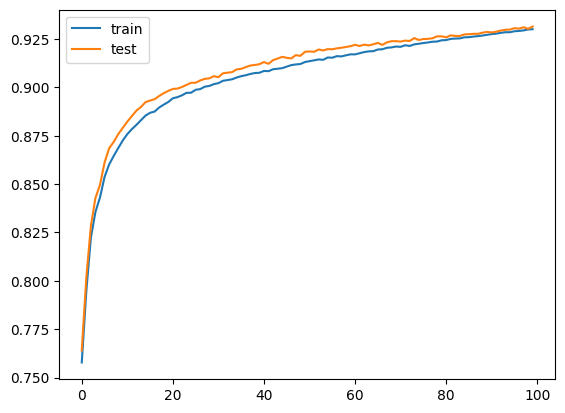

In [17]:
from torch.optim import SGD
import matplotlib.pyplot as plt
import numpy as np

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 100
batch_size = 256

loss_fn = nn.CrossEntropyLoss() # 손실함수로 CrossEntroyLoss 사용

# trainloader, testloader의 정확도를 저장할 list
train_accs = []
test_accs = []

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

for epoch in range(n_epochs):
  total_loss = 0

  model.train() # 학습 모드로 설정
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  model.eval() # 평가 모드로 설정
  train_acc = accuracy(model, trainloader)
  test_acc = accuracy(model, testloader)
  train_accs.append(train_acc)
  test_accs.append(test_acc)
  print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

plot_acc(train_accs, test_accs)

In [ ]:
!git